# Análise dos dados categóricos

### Importação das bibliotecas e do dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cirrose = pd.read_csv("..\data\dados_processados\liver_cirrhosis_v1.csv")
display(df_cirrose.head())

,Numero_dias,Situação,Droga,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,2221,Sobreviveu,Placebo,18499,F,N,S,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,Sobreviveu,Placebo,19724,M,S,N,S,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,Sobreviveu,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,Morte,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,Morte,Placebo,21699,F,N,S,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


#### Parte de Gabi:

### Printando todas as colunas categoricas e os valores por coluna

In [3]:
categ_columns = list(df_cirrose.select_dtypes(include=['object']).columns)
categ_columns.append('Estágio')
print("Colunas:", categ_columns)

print("\nValores por coluna categórica:\n")
for i in categ_columns:
    print(df_cirrose[i].value_counts(),"\n")

Colunas: ['Situação', 'Droga', 'Sexo', 'Ascite', 'Hepatomegalia', 'Telangiectasia', 'Edema', 'Estágio']

Valores por coluna categórica:

Situação
Sobreviveu     5325
Morte          3704
Transplante     608
Name: count, dtype: int64 

Droga
Placebo           6212
D-penicilamina    3425
Name: count, dtype: int64 

Sexo
F    8559
M    1078
Name: count, dtype: int64 

Ascite
N    6328
S    3309
Name: count, dtype: int64 

Hepatomegalia
N    5904
S    3733
Name: count, dtype: int64 

Telangiectasia
N    4959
S    4678
Name: count, dtype: int64 

Edema
N    8055
S    1582
Name: count, dtype: int64 

Estágio
2    3308
3    3304
1    3025
Name: count, dtype: int64 



Inicialmente, foi criada uma lista com o objetivo de identificar as colunas de dados categóricos. A coluna 'Estágio' foi adicionada manualmente, pois, apesar de ter tido seus dados classificados como numéricos, são dados categóricos. Em seguida, são exibidos quantos pacientes cada classe em cada coluna possui.

### Gráfico da relação entre o tipo da droga recebida e a situação do paciente

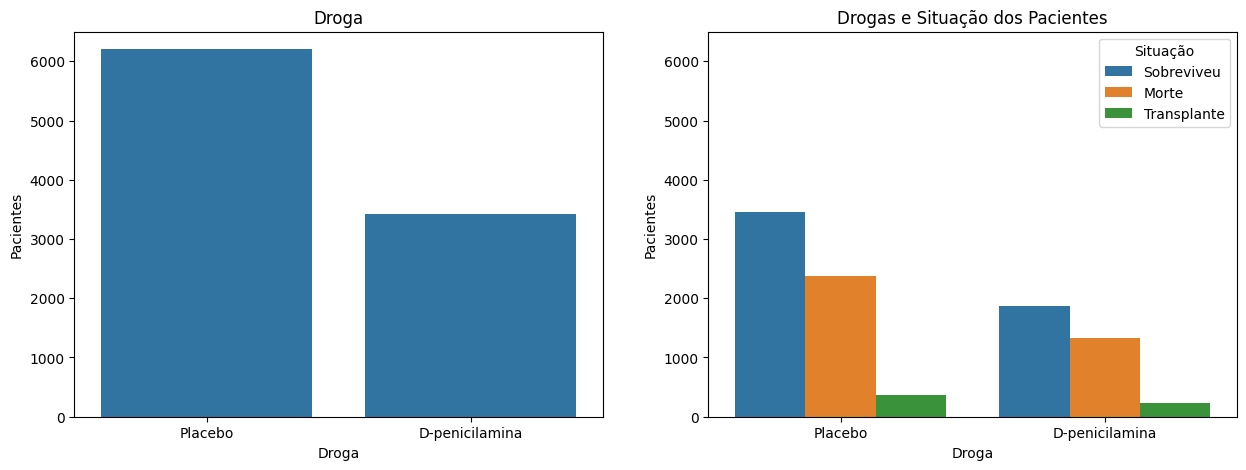

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df_cirrose, x='Droga', ax=axs[0])
axs[0].set_title('Droga')
axs[0].set_xlabel('Droga')
axs[0].set_ylabel('Pacientes')
axs[0].set_ylim(0, 6500)

sns.countplot(data=df_cirrose, x='Droga', hue='Situação', ax=axs[1])
axs[1].set_title('Drogas e Situação dos Pacientes')
axs[1].set_xlabel('Droga')
axs[1].set_ylabel('Pacientes')
axs[1].legend(title='Situação')
axs[1].set_ylim(0, 6500)

plt.show()

A análise dos gráficos nos permite visualizar que mais da metade dos pacientes que utilizam uma das duas drogas sobrevivem. Além disso, apesar dos números de sobreviventes serem altos, o número de mortes também é. Por fim, nota-se que o número de pacientes transplantados é muito pequeno quando comparado aos números de sobreviventes e de mortes.

### Distribuição de pacientes e problema(s) apresentado(s)

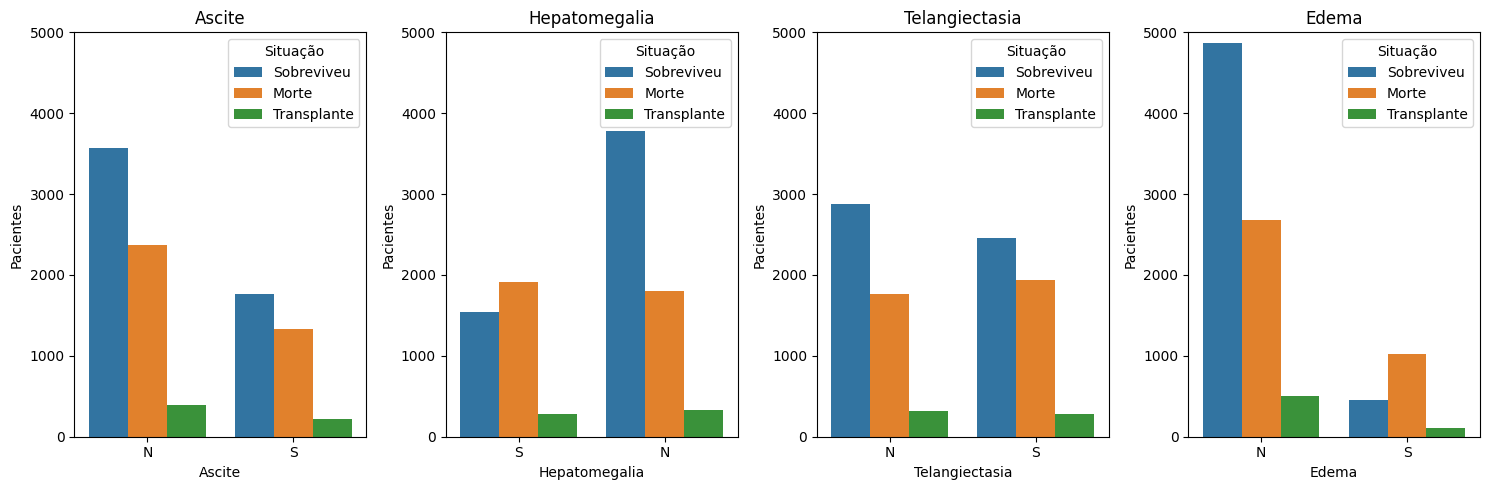

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.countplot(data=df_cirrose, x='Ascite', hue='Situação', ax=axs[0])
axs[0].set_title('Ascite')
axs[0].set_xlabel('Ascite')
axs[0].set_ylabel('Pacientes')
axs[0].set_ylim(0, 5000)
axs[0].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Hepatomegalia', hue='Situação', ax=axs[1])
axs[1].set_title('Hepatomegalia')
axs[1].set_xlabel('Hepatomegalia')
axs[1].set_ylabel('Pacientes')
axs[1].set_ylim(0, 5000)
axs[1].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Telangiectasia', hue='Situação', ax=axs[2])
axs[2].set_title('Telangiectasia')
axs[2].set_xlabel('Telangiectasia')
axs[2].set_ylabel('Pacientes')
axs[2].set_ylim(0, 5000)
axs[2].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Edema', hue='Situação', ax=axs[3])
axs[3].set_title('Edema')
axs[3].set_xlabel('Edema')
axs[3].set_ylabel('Pacientes')
axs[3].set_ylim(0, 5000)
axs[3].legend(title='Situação')

plt.tight_layout()

plt.show()

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.countplot(data=df_cirrose, x='Ascite', hue='Situação', ax=axs[0])
axs[0].set_title('Ascite')
axs[0].set_xlabel('Ascite')
axs[0].set_ylabel('Pacientes')
axs[0].set_ylim(0, 5000)
axs[0].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Hepatomegalia', hue='Situação', ax=axs[1])
axs[1].set_title('Hepatomegalia')
axs[1].set_xlabel('Hepatomegalia')
axs[1].set_ylabel('Pacientes')
axs[1].set_ylim(0, 5000)
axs[1].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Telangiectasia', hue='Situação', ax=axs[2])
axs[2].set_title('Telangiectasia')
axs[2].set_xlabel('Telangiectasia')
axs[2].set_ylabel('Pacientes')
axs[2].set_ylim(0, 5000)
axs[2].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Edema', hue='Situação', ax=axs[3])
axs[3].set_title('Edema')
axs[3].set_xlabel('Edema')
axs[3].set_ylabel('Pacientes')
axs[3].set_ylim(0, 5000)
axs[3].legend(title='Situação')

plt.tight_layout()

plt.show()
Ao comparar os gráficos anteriores, percebemos que telangiectasia não é um fator determinante para a sobrevivência do paciente. Além disso, observa-se que pacientes que não possuem hepatomegalia têm muito mais chances de sobrevivência do que aqueles que possuem. O mesmo ocorre para os pacientes que possuem edema.

### Selecionando as colunas com dados categóricos

In [9]:
df_categoricos = df_cirrose.select_dtypes(include=['object'])
df_categoricos['Estágio'] = df_cirrose['Estágio']
df_categoricos

,Situação,Droga,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Estágio
0,Sobreviveu,Placebo,F,N,S,N,N,1
1,Sobreviveu,Placebo,M,S,N,S,N,2
2,Sobreviveu,Placebo,F,N,N,N,N,2
3,Morte,Placebo,F,N,N,N,N,2
4,Morte,Placebo,F,N,S,N,N,1
...,...,...,...,...,...,...,...,...
9632,Sobreviveu,Placebo,F,S,N,S,N,1
9633,Sobreviveu,Placebo,F,S,N,S,N,1
9634,Morte,D-penicilamina,F,N,S,N,N,3
9635,Sobreviveu,D-penicilamina,F,N,N,N,N,2


### Substituindo valores categóricos por 0 ou 1

Valores da coluna 'Sexo'

    F (feminino)    = 1    
    M (masculino)   = 0  
    N (não) = 0   
    S (sim) = 1

In [10]:
df_cirrose['Situação'] = df_cirrose['Situação'].replace('Transplante', 'Sobreviveu')

conversao = {
    'M': 0,
    'F': 1,
    'N' : 0,
    'S' : 1,
    'Morte': 0,
    'Sobreviveu': 1,
    'D-penicilamina': 0,
    'Placebo': 1,
}

df_categoricos = df_categoricos.replace(conversao)
df_categoricos

C:\Users\jakel\AppData\Local\Temp\ipykernel_3772\3321279647.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_categoricos = df_categoricos.replace(conversao)


,Situação,Droga,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Estágio
0,1,1,1,0,1,0,0,1
1,1,1,0,1,0,1,0,2
2,1,1,1,0,0,0,0,2
3,0,1,1,0,0,0,0,2
4,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
9632,1,1,1,1,0,1,0,1
9633,1,1,1,1,0,1,0,1
9634,0,0,1,0,1,0,0,3
9635,1,0,1,0,0,0,0,2


### Transformação em csv para utilização futura

Mesma execução da feita no pré-processamento.

In [11]:
import os

pasta = '../data/dados_processados'
arquivo = 'categorical.csv'
caminho_arquivo = os.path.join(pasta, arquivo)

#Verifica se a pasta existe, se não, cria a pasta
if not os.path.exists(pasta):
    os.makedirs(pasta)

#Verifica se o arquivo já existe, se existir, remove
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)

#Salva o DataFrame como um arquivo CSV
df_categoricos.to_csv(caminho_arquivo, index=False)

print(f'O arquivo {arquivo} foi salvo na pasta {pasta}.')

O arquivo categorical.csv foi salvo na pasta ../data/dados_processados.


# PARTE DE RAFAEL

# <span style="color:lightblue"> Realizando a Análise Exploratória dos Dados Categóricos</span>

### Análise 01: Quantidade Homens e Mulheres por Estágio da Doença

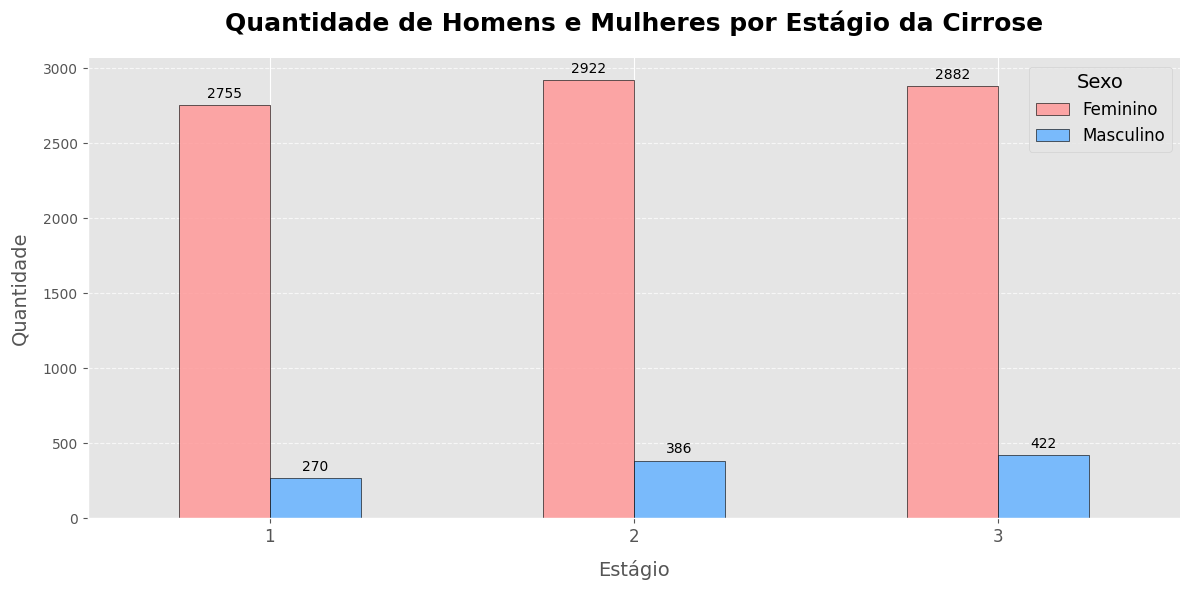

In [12]:
grouped_data = df_cirrose.groupby(['Estágio', 'Sexo']).size().unstack()

# Estilzando o gráfico
plt.style.use('ggplot')
colors = ['#ff9999', '#66b3ff']
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=colors, edgecolor='black', alpha=0.85)


plt.title('Quantidade de Homens e Mulheres por Estágio da Cirrose', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Estágio', fontsize=14, labelpad=10)
plt.ylabel('Quantidade', fontsize=14, labelpad=10)

# Adicionando rótulos de dados em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)


plt.legend(title='Sexo', labels=['Feminino', 'Masculino'], fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

# Removendo as bordas do gráfico (por motivos estéticos)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()
plt.show()

#### Conclusões da Análise 01:
* Com esse gráfico de barras agrupados, é perceptível que o grupo das mulheres é abrangentemente mais afetado em todas os estágio da doença, enquanto que os homens estão em minoria, com o grupo das mulheres sendo uma média de 10x maior que os homens, com uma diferença média de 90% entre os dois grupos em todos os estágios da doença.


* Também podemos perceber que o número de pessoas de ambas as classes vai aumentando com o passar do nível do estágio da cirrose, o que indica que a doença tende a ser bem progressiva e dificilmente um paciente é curado já no primeiro estágio




### Análise 02: Quantidade de Sobreviventes/Transplantados e mortos por sexo (Masculino e Feminino)

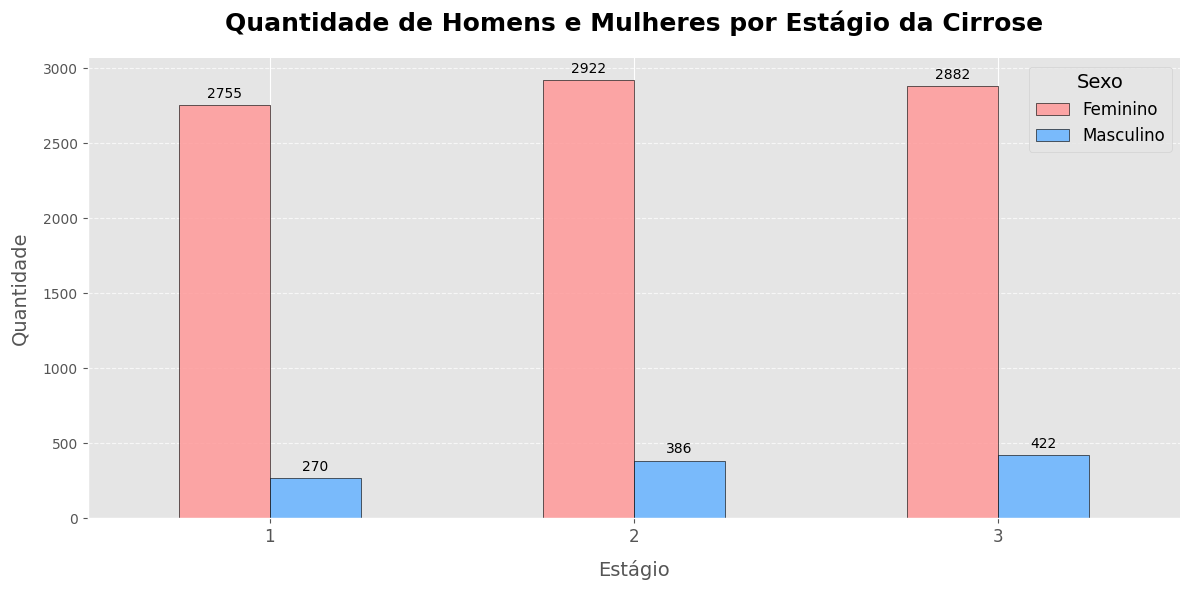

In [13]:
grouped_data = df_cirrose.groupby(['Estágio', 'Sexo']).size().unstack()

# Estilzando o gráfico
plt.style.use('ggplot')
colors = ['#ff9999', '#66b3ff']
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=colors, edgecolor='black', alpha=0.85)


plt.title('Quantidade de Homens e Mulheres por Estágio da Cirrose', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Estágio', fontsize=14, labelpad=10)
plt.ylabel('Quantidade', fontsize=14, labelpad=10)

# Adicionando rótulos de dados em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)


plt.legend(title='Sexo', labels=['Feminino', 'Masculino'], fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

# Removendo as bordas do gráfico (por motivos estéticos)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()
plt.show()


#### Conclusões da Análise 02:
* Analisando o gráfico a primeira vista, talvez pensamos que o grupo feminino tem muito mais óbitos que o masculino. Quantitativamente pode até ser, mas proporcionalmente falando a relação que homens e mulheres que sobrevivem a cirrose é praticamente a mesma:
    * No grupo feminino, o número de sobreviventes em relação aos falecidos tem uma diferença de aproximadamente 38%;
    * Já no grupo masculino, essa diferença é de 30%


* Por isso, concluimos que pelos dados fornecidos, inevitavelmente mais mulheres tenderão a sobreviver nos tratamentos, porém proporcionalmente falando, essa diferença entre sobreviventes ou que receberam transplantes e entre os que vieram a óbito é praticamente a mesma coisa em ambos os sexos

### Análise 03: Distribuição de Sobreviventes e Óbitos por Estágio da Cirrose

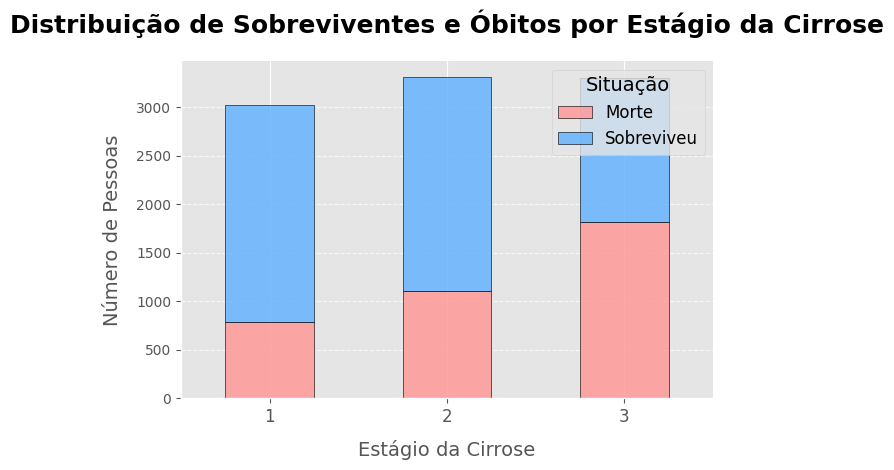

In [14]:
df_filtrado = df_cirrose[df_cirrose['Situação'] != 'Transplante']

contagem = df_filtrado.groupby(['Estágio', 'Situação']).size().unstack()


plt.style.use('ggplot')
colors = ['#ff9999', '#66b3ff']
ax = contagem.plot(kind='bar', stacked=True, color=colors, edgecolor='black', alpha=0.85)

plt.xlabel('Estágio da Cirrose', fontsize=14, labelpad=10)
plt.ylabel('Número de Pessoas', fontsize=14, labelpad=10)
plt.title('Distribuição de Sobreviventes e Óbitos por Estágio da Cirrose', fontsize=18, fontweight='bold', pad=20)
legend_labels = ['Morte', 'Sobreviveu']
plt.legend(legend_labels, fontsize=12, title='Situação', title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


#### Conclusões da Análise 03:
* Nessa terceira análise, percebemos que conforme os estágios da cirrose vão progredindo, mais sucetíveis as pessoas ficam de não sobreviver. Enquanto nos estágios inicias da doença, todos tem mais chance de continuarem vivos.
* Desse modo, concluímos que os tratamentos da cirrose não tendem a ser tão efetivos nos estágios mais avançados e que o quanto antes for tratado, melhor para o paciente. 